In [1]:
import pip
pip.main(['install', '-U', 'pycse==1.6.3'])
pip.main(['install', '-U', 'uncertainties'])
pip.main(['install', '-U', 'quantities'])

Requirement already up-to-date: pycse==1.6.3 in /home/nbcommon/anaconda3_431/lib/python3.6/site-packages
  Found existing installation: quantities 0.12.1
    Uninstalling quantities-0.12.1:
      Successfully uninstalled quantities-0.12.1
Requirement already up-to-date: uncertainties in /home/nbcommon/anaconda3_431/lib/python3.6/site-packages
Requirement already up-to-date: quantities in /home/nbcommon/anaconda3_431/lib/python3.6/site-packages


Exception:
Traceback (most recent call last):
  File "/home/nbuser/anaconda3_431/lib/python3.6/site-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/home/nbuser/anaconda3_431/lib/python3.6/site-packages/pip/commands/install.py", line 335, in run
    wb.build(autobuilding=True)
  File "/home/nbuser/anaconda3_431/lib/python3.6/site-packages/pip/wheel.py", line 749, in build
    self.requirement_set.prepare_files(self.finder)
  File "/home/nbuser/anaconda3_431/lib/python3.6/site-packages/pip/req/req_set.py", line 380, in prepare_files
    ignore_dependencies=self.ignore_dependencies))
  File "/home/nbuser/anaconda3_431/lib/python3.6/site-packages/pip/req/req_set.py", line 666, in _prepare_file
    check_dist_requires_python(dist)
  File "/home/nbuser/anaconda3_431/lib/python3.6/site-packages/pip/utils/packaging.py", line 48, in check_dist_requires_python
    feed_parser.feed(metadata)
  File "/home/nbuser/anaconda3_431/lib/python3.6/email/feedp

2

$$ r1 = 0.05[Ca]^2..( mol/(lit.min)) \\
r2 = 0.022[Cb]..(mol/(lit.min))   $$

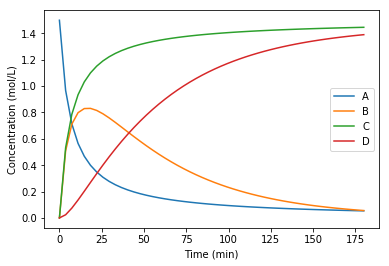

In [2]:
#1B:

import quantities as u
import numpy as np
from scipy.integrate import odeint

k1 = 0.05 #* u.litre/(u.mol*u.minute)
k2 = 0.022 #/ u.minute
C0 = [1.5,0,0,0]  #mol/litre

def conc (C , t):
    Ca , Cb , Cc, Cd = C
    r1 = k1 * (Ca)**2
    r2 = k2 * (Cb)
    
    ra = dCadt = -2 * r1
    rb = dCbdt = 2 * r1 - 1 * r2
    rc = dCcdt = 2 * r1
    rd = dCddt = 1 * r2
    
    return [dCadt, dCbdt, dCcdt, dCddt] #* u.mol/u.litre
    
tspan = np.linspace(0 , 180) 

ans = odeint(conc, C0, tspan)

import matplotlib.pyplot as plt
plt.plot(tspan, ans)
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mol/L)')
plt.legend(['A','B', 'C', 'D'])
plt.show()

In [3]:
#1C:

import quantities as u
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
from pycse import odelay


k1 = 0.05 #* u.litre/(u.mol*u.minute)
k2 = 0.022 #/ u.minute
C0 = [1.5,0,0,0]  #mol/litre
#r1 = k1 * (Ca)**2       mol/(lit.min)
#r2 = k2 * (Cb)          mol/(lit.min)   



def conc (C , t):
    Ca , Cb , Cc, Cd = C
    r1 = k1 * (Ca)**2
    r2 = k2 * (Cb)
    
    ra = dCadt = -2 * r1
    rb = dCbdt = 2 * r1 - 1 * r2
    rc = dCcdt = 2 * r1
    rd = dCddt = 1 * r2
    
    return [dCadt, dCbdt, dCcdt, dCddt] #* u.mol/u.litre
    
tspan = np.linspace(0 , 180) 

def event1 (C, t):
    #we know that rB will be zero at maxima
    a = conc(C , t)
    value = a[1] - 0.0
    isterminal = True
    direction = -1  
    return value, isterminal, direction

a, b, c, d, e = odelay(conc, C0, tspan, events=[event1])

print ("Time for max B concentration is", a[-1], "minutes")
print ("Concentration at tbmax is ", b[-1])


Time for max B concentration is 16.6894098375 minutes
Concentration at tbmax is  [ 0.42815418  0.83325457  1.07184582  0.23859125]


Stage 1:

Time for max B concentration is 23.0712553608 minutes
Concentrations of A,B,C,D are [ 0.27469072  0.34297724  0.47530928  0.13233204] respectively. 

Stage 2 begins here:

New initial concentrations for the reaction: [ 1.02469072  0.34297724  0.47530928  0.13233204] 

Time for second max B concentration is 37.939216659 minutes
Concentrations of A,B,C,D at second max B are [ 0.40605846  0.74947031  1.09394154  0.34447123] respectively. 



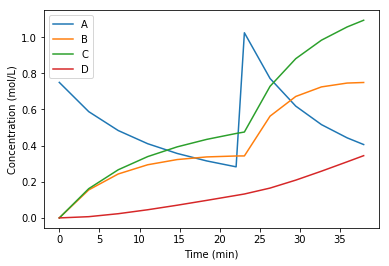

Max B is higher with the 2 stage reaction


In [4]:
#1D:

print ("Stage 1:\n")

import quantities as u
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
from pycse import odelay


k1 = 0.05 #* u.litre/(u.mol*u.minute)
k2 = 0.022 #/ u.minute
C0 = [0.75,0,0,0]  #mol/litre
#r1 = k1 * (Ca)**2       mol/(lit.min)
#r2 = k2 * (Cb)          mol/(lit.min)   



def conc (C , t):
    Ca , Cb , Cc, Cd = C
    r1 = k1 * (Ca)**2
    r2 = k2 * (Cb)
    
    ra = dCadt = -2 * r1
    rb = dCbdt = 2 * r1 - 1 * r2
    rc = dCcdt = 2 * r1
    rd = dCddt = 1 * r2
    
    return [dCadt, dCbdt, dCcdt, dCddt] #* u.mol/u.litre
    
tspan = np.linspace(0 , 180) 

def event1 (C, t):
    #we know that rB will be zero at maxima
    a = conc(C , t)
    value = a[1] - 0.0
    isterminal = True
    direction = -1
    return value, isterminal, direction

a, b, c, d, e = odelay(conc, C0, tspan, events=[event1])
tbmax=a[-1]
print ("Time for max B concentration is", tbmax, "minutes")
print("Concentrations of A,B,C,D are", b[-1],"respectively. \n")

C0new = b[-1] #mol/litre

print ("Stage 2 begins here:\n")

#dumping 75 additional moles of A in 100 lit tank

C0new[0]+=0.75 #mol/litre
print ("New initial concentrations for the reaction:", C0new, "\n")

tspannew = np.linspace( tbmax, 180)

a1, b1, c1, d1, e1 = odelay(conc, C0new, tspannew, events=[event1])
tbmax1 = a1

Ctbmax1 = b1
#print(tbmax1)
#print (Ctbmax1)

print ("Time for second max B concentration is", tbmax1[-1], "minutes")
print("Concentrations of A,B,C,D at second max B are", Ctbmax1[-1],"respectively. \n")

t = []
t.extend(a)
t.extend(a1)

C = []
C.extend(b)
C.extend(b1)
#print (t)
#print (C)

import matplotlib.pyplot as plt
plt.plot(t, C)
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mol/L)')
plt.legend(['A','B', 'C', 'D'])
plt.show()

print ("Max B is higher with the 2 stage reaction")

# Question 2

with the rate constants \begin{align} k_1 = 7 \times 10^5 L/mol\cdot hr && K_1=0.31\ k_2 = 4 \times 10^5 L/mol\cdot hr && K_2=0.48\ \end{align}

 Notation: k forward is represented by kf and k backward is represented by kb for reactions 1 and 2

$$r1(forward) = 700000[C_6H_6]^2..( mol/(lit.min)) \\
r1(backward) = 2258064[C12H10][H_2]..(mol/(lit.min)) $$

$$r1(net) = 700000[C_6H_6]^2 - 2258064[C12H10][H_2]..(mol/(lit.min)) $$

$$r2(forward) = 400000[C_6H_6][C12H10]..( mol/(lit.min)) \\
r2(backward) = 833333[C18H14][H_2]..(mol/(lit.min)) $$

$$r2(net) = 400000[C_6H_6][C12H10] - 833333[C18H14][H_2]..(mol/(lit.min)) $$


In [5]:

"""Notation: k forward is represented by kf and k backward is represented by kb for reactions 1 and 2"""
k1f=7* (10)**5 #L/mol.hr
K1=0.31
k1b= K1 * k1f #L/mol.hr

k2f=4 * 10**5 #L/mol.hr
K2=0.48
k2b=K2*k2f #L/mol.hr



Answer 2B:

The volumetric flowrate of benzene at inlet is: 5082360.0

Answer 2C:



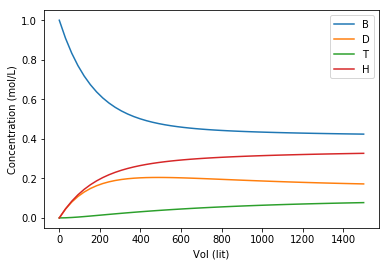

Volume for 50% conversion is 402.758006005 lit


In [6]:
#2B:

import quantities as u
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
from pycse import odelay

k1f=7* (10)**5 #L/mol.hr
K1=0.31
k1b= k1f/K1 #L/mol.hr

k2f=4 * 10**5 #L/mol.hr
K2=0.48
k2b=k2f/K2 #L/mol.hr
#print(k1b, k2b)
FB0= 60000 #*u.mol/u.hr
T0=1033 #*u.K
P=1 #*u.atm
R=0.082 #*u.litre*u.atm/(u.K*u.mol) 
#assuming Z=1

nu0=FB0*R*T0/P

print("Answer 2B:\n")
print("The volumetric flowrate of benzene at inlet is:", nu0)

#Yes, the volumetric flow rate will change due to change in molar flow rate


#2C:

F0=[60000,0,0,0]

def reaction (F,V):
    
    FB, FD, FT, FH = F
    Ft=sum(F)
    nu=Ft*nu0/FB0
    CB=FB/nu
    CD=FD/nu
    CT=FT/nu
    CH=FH/nu
    
    r1f=k1f*CB**2
    r1b=k1b*CD*CH
    r2f=k2f*CB*CD
    r2b=k2b*CT*CH
    
    rB=-2*r1f+2*r1b-r2f+r2b
    rD=r1f-r1b-r2f+r2b
    rT=r2f-r2b
    rH=r1f-r1b+r2f-r2b
    
    return rB, rD,rT, rH
vspan = np.linspace(0,1500)

ans = odeint(reaction,F0, vspan)
mf=ans/FB0
#print(ans)
print("\nAnswer 2C:\n")
import matplotlib.pyplot as plt
plt.plot(vspan, mf)
plt.xlabel('Vol (lit)')
plt.ylabel('Concentration (mol/L)')
plt.legend(['B','D', 'T', 'H'])
plt.show()

#2D:

def event1(F,V):
    value = F[0] - 30000
    isterminal = True
    direction = 0  
    return value, isterminal, direction

a,b,c,d,e = odelay(reaction, F0, vspan, events=[event1])
print ("Volume for 50% conversion is",a[-1], "lit")

[[     0.              0.        ]
 [  2714.92843416     37.02151867]
 [  4973.03983352    130.20478797]
 [  6875.04939753    259.50228708]
 [  8493.94613916    411.2818404 ]
 [  9883.99692402    576.13880449]
 [ 11086.43840453    747.52627488]
 [ 12133.19997788    920.86959633]
 [ 13049.41135858   1092.97831242]
 [ 13855.13579363   1261.64650335]
 [ 14316.87829989   1366.24340021]]


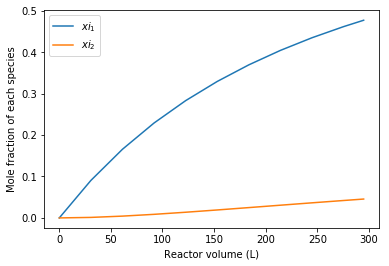

The volume required for 50% conversion is 294.9461412667717 L


In [7]:
#2E:
    
import quantities as u
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
from pycse import odelay

k1f=7* (10)**5 #L/mol.hr
K1=0.31
k1b= k1f/K1 #L/mol.hr

k2f=4 * 10**5 #L/mol.hr
K2=0.48
k2b=k2f/K2 #L/mol.hr

FB0= 60000 #*u.mol/u.hr
T0=1033 #*u.K
P=1 #*u.atm
R=0.082 #*u.litre*u.atm/(u.K*u.mol) 
#assuming Z=1


stoich_coefficients = np.array([[-2,1,0,1],[-1,-1,1,1]])
k1 = k1f
k1r = k1b
k2 = k2f
k2r = k2b
Q = nu0
F0 = [60000,0,0,0]
xi0 = np.array([0,0])
def dxidV(xi, V):
    F = F0 + np.matmul(stoich_coefficients.transpose(), xi)
    r1 = k1*F[0]**2/Q**2 - k1r*F[1]*F[2]/Q**2
    r2 = k2*F[0]*F[1]/Q**2 - k2r*F[2]*F[3]/Q**2
    return [r1, r2]

def event(xi, V):
    value = FB0+(-2*xi[0]-xi[1])-FB0/2
    isterminal = True
    direction = 0
    return value, isterminal, direction

Vrange = np.linspace(0, 1500)
V, xi, Ve, xie, ie = odelay(dxidV, xi0, Vrange, [event])
print (xi)
plt.plot(V, xi/30000)
plt.xlabel('Reactor volume (L)')
plt.ylabel('Mole fraction of each species')
plt.legend(labels=['$xi_1$','$xi_2$'])
plt.show()
print('The volume required for 50% conversion is {} L'.format(Ve[0]))